In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    ])

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True,transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)

mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=True)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

class AE(nn.Module):
    def __init__(self,bootleneck_params):
        super(AE, self).__init__()
        self.bootleneck_params=  bootleneck_params
        #Encoder
        self.enc1 = nn.Linear(in_features=784, out_features=300)
         # Input image (28*28 = 784)
        self.enc2 = nn.Linear(in_features=300, out_features=100)
        self.enc3 = nn.Linear(in_features=100, out_features=32)
        self.enc4 = nn.Linear(in_features=32, out_features= self.bootleneck_params)

        #Decoder 
        self.dec1 = nn.Linear(in_features =self.bootleneck_params, out_features=32)
        self.dec2 = nn.Linear(in_features=32, out_features=100)
        self.dec3 = nn.Linear(in_features=100, out_features=300)
        self.dec4 = nn.Linear(in_features=300, out_features=784)

    def forward(self, x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = F.relu(self.enc4(x))

        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        x = self.dec4(x)

        return x

cuda:0


In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)

torch.Size([128, 1, 28, 28])


In [ ]:
def train(model,epoch,optimizer,scheduler):
    for epoch in range(epoch):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            inputs = inputs.view(inputs.size(0), -1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        # scheduler.step() 
        loss = running_loss / len(train_loader)
        print('Epoch {} of {}, Train Loss: {:.3f}'.format(
            epoch+1, 10, loss))

In [ ]:
def test(model):
    total = 0
    total_loss = 0
    with torch.no_grad():
        running_loss = 0.0
        for data in test_loader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.view(images.size(0), -1)
            outputs = model(images)
            total += labels.size(0)
            loss = criterion(outputs, images)
            running_loss += loss.item()
        total_loss = running_loss / len(test_loader)
    return total_loss

Epoch 1 of 5, Train Loss: 0.068
Epoch 2 of 5, Train Loss: 0.067
Epoch 3 of 5, Train Loss: 0.067
Epoch 4 of 5, Train Loss: 0.067
Epoch 5 of 5, Train Loss: 0.067
test loss 0.06748806685209274
Epoch 1 of 5, Train Loss: 0.060
Epoch 2 of 5, Train Loss: 0.055
Epoch 3 of 5, Train Loss: 0.052
Epoch 4 of 5, Train Loss: 0.051
Epoch 5 of 5, Train Loss: 0.049
test loss 0.04877818309808079
Epoch 1 of 5, Train Loss: 0.053
Epoch 2 of 5, Train Loss: 0.039
Epoch 3 of 5, Train Loss: 0.034
Epoch 4 of 5, Train Loss: 0.032
Epoch 5 of 5, Train Loss: 0.031
test loss 0.03094981938506229
Epoch 1 of 5, Train Loss: 0.051
Epoch 2 of 5, Train Loss: 0.032
Epoch 3 of 5, Train Loss: 0.028
Epoch 4 of 5, Train Loss: 0.026
Epoch 5 of 5, Train Loss: 0.025
test loss 0.024446978363432462
Epoch 1 of 5, Train Loss: 0.050
Epoch 2 of 5, Train Loss: 0.032
Epoch 3 of 5, Train Loss: 0.028
Epoch 4 of 5, Train Loss: 0.025
Epoch 5 of 5, Train Loss: 0.024
test loss 0.023301097387565844
Epoch 1 of 5, Train Loss: 0.051
Epoch 2 of 5, Tr

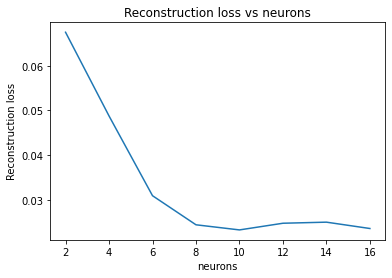

In [ ]:
# // Adam Optimizer
import matplotlib.pyplot as plt
import torch.optim.lr_scheduler as schedu
import torch.optim as optim
Lr_Rate = 1e-3
criterion = nn.MSELoss()
loss_range=[]
for bottleneck_neuron in range(2,17,2):
   ae= AE(bottleneck_neuron)
   optimizer = torch.optim.Adam(ae.parameters(),  lr=Lr_Rate)
   criterion = nn.MSELoss()
  #  scheduler = schedu.StepLR(optimizer, step_size=5, gamma=0.1)
   scheduler = schedu.StepLR(optimizer, step_size=3, gamma=0.1)
   ae.to(device)
   train(ae,5,optimizer,scheduler)
   test_loss=test(ae)
   print('test loss',test_loss)
   loss_range.append(test_loss)
no_of_neurons=[2,4,6,8,10,12,14,16]
plt.plot(no_of_neurons,loss_range)
plt.title('Reconstruction loss vs neurons')
plt.xlabel('neurons')
plt.ylabel('Reconstruction loss')
plt.show()

Epoch 1 of 10, Train Loss: 0.166
Epoch 2 of 10, Train Loss: 0.068
Epoch 3 of 10, Train Loss: 0.067
Epoch 4 of 10, Train Loss: 0.067
Epoch 5 of 10, Train Loss: 0.067
Epoch 6 of 10, Train Loss: 0.067
Epoch 7 of 10, Train Loss: 0.067
Epoch 8 of 10, Train Loss: 0.067
Epoch 9 of 10, Train Loss: 0.067
Epoch 10 of 10, Train Loss: 0.067
Epoch 1 of 10, Train Loss: 0.116
Epoch 2 of 10, Train Loss: 0.068
Epoch 3 of 10, Train Loss: 0.067
Epoch 4 of 10, Train Loss: 0.067
Epoch 5 of 10, Train Loss: 0.067
Epoch 6 of 10, Train Loss: 0.067
Epoch 7 of 10, Train Loss: 0.067
Epoch 8 of 10, Train Loss: 0.067
Epoch 9 of 10, Train Loss: 0.067
Epoch 10 of 10, Train Loss: 0.067
Epoch 1 of 10, Train Loss: 822.957
Epoch 2 of 10, Train Loss: 0.068
Epoch 3 of 10, Train Loss: 0.067
Epoch 4 of 10, Train Loss: 0.068
Epoch 5 of 10, Train Loss: 0.067
Epoch 6 of 10, Train Loss: 0.067
Epoch 7 of 10, Train Loss: 0.067
Epoch 8 of 10, Train Loss: 0.067
Epoch 9 of 10, Train Loss: 0.067
Epoch 10 of 10, Train Loss: 0.067
Epoch

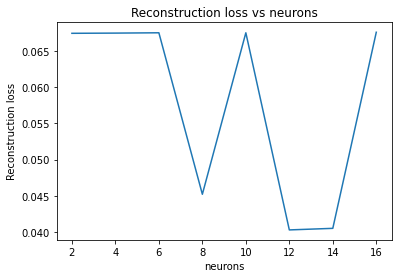

In [ ]:
# // RMSprop optimizier
import matplotlib.pyplot as plt
import torch.optim as optim

criterion = nn.MSELoss()
ae= AE(16)
ae.to(device)
loss_range=[]
for bottleneck_neuron in range(2,17,2):
   ae= AE(bottleneck_neuron)
   ae.to(device)
   optimizer = torch.optim.RMSprop(ae.parameters())
  #  scheduler = schedu.StepLR(optimizer, step_size=5, gamma=0.1)
   train(ae,5,optimizer,None)
   loss_range.append(test(ae))
no_of_neurons=[2,4,6,8,10,12,14,16]
plt.plot(no_of_neurons,loss_range)
plt.title('Reconstruction loss vs neurons')
plt.xlabel('neurons')
plt.ylabel('Reconstruction loss')
plt.show()

In [ ]:
PATH = './q2.pth'
torch.save(net_d.state_dict(), PATH)

Epoch 1 of 5, Train Loss: 0.115
Epoch 2 of 5, Train Loss: 0.114
Epoch 3 of 5, Train Loss: 0.114
Epoch 4 of 5, Train Loss: 0.114
Epoch 5 of 5, Train Loss: 0.113
test loss 0.11500922118938423
Epoch 1 of 5, Train Loss: 0.115
Epoch 2 of 5, Train Loss: 0.114
Epoch 3 of 5, Train Loss: 0.114
Epoch 4 of 5, Train Loss: 0.114
Epoch 5 of 5, Train Loss: 0.113
test loss 0.11510918647805347
Epoch 1 of 5, Train Loss: 0.113
Epoch 2 of 5, Train Loss: 0.113
Epoch 3 of 5, Train Loss: 0.113
Epoch 4 of 5, Train Loss: 0.113
Epoch 5 of 5, Train Loss: 0.112
test loss 0.11421201727058314
Epoch 1 of 5, Train Loss: 0.115
Epoch 2 of 5, Train Loss: 0.115
Epoch 3 of 5, Train Loss: 0.114
Epoch 4 of 5, Train Loss: 0.114
Epoch 5 of 5, Train Loss: 0.114
test loss 0.11549965301646462
Epoch 1 of 5, Train Loss: 0.114
Epoch 2 of 5, Train Loss: 0.114
Epoch 3 of 5, Train Loss: 0.114
Epoch 4 of 5, Train Loss: 0.113
Epoch 5 of 5, Train Loss: 0.113
test loss 0.11485471359536617
Epoch 1 of 5, Train Loss: 0.113
Epoch 2 of 5, Trai

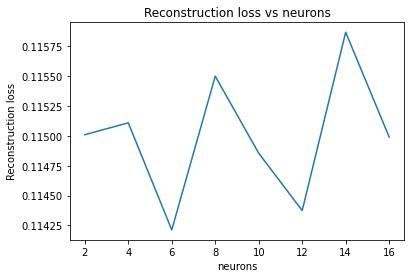

In [ ]:
# // Sgd optimizier
import matplotlib.pyplot as plt
import torch.optim.lr_scheduler as schedu
import torch.optim as optim
criterion = nn.MSELoss()
loss_range=[]
for bottleneck_neuron in range(2,17,2):
   ae= AE(bottleneck_neuron)
   ae.to(device)
   optimizer = optim.SGD(ae.parameters(), lr=0.001)
   scheduler = schedu.StepLR(optimizer, step_size=3, gamma=0.1)
   train(ae,5,optimizer,scheduler)
   test_loss=test(ae)
   print('test loss',test_loss)
   loss_range.append(test_loss)
no_of_neurons=[2,4,6,8,10,12,14,16]
plt.plot(no_of_neurons,loss_range)
plt.title('Reconstruction loss vs neurons')
plt.xlabel('neurons')
plt.ylabel('Reconstruction loss')
plt.show()

Epoch 1 of 5, Train Loss: 0.113
Epoch 2 of 5, Train Loss: 0.109
Epoch 3 of 5, Train Loss: 0.107
Epoch 4 of 5, Train Loss: 0.105
Epoch 5 of 5, Train Loss: 0.105
Epoch 6 of 5, Train Loss: 0.104
Epoch 7 of 5, Train Loss: 0.104
Epoch 8 of 5, Train Loss: 0.104
Epoch 9 of 5, Train Loss: 0.104
Epoch 10 of 5, Train Loss: 0.104
test loss 0.10616987208022347
Epoch 1 of 5, Train Loss: 0.112
Epoch 2 of 5, Train Loss: 0.109
Epoch 3 of 5, Train Loss: 0.107
Epoch 4 of 5, Train Loss: 0.105
Epoch 5 of 5, Train Loss: 0.105
Epoch 6 of 5, Train Loss: 0.105
Epoch 7 of 5, Train Loss: 0.105
Epoch 8 of 5, Train Loss: 0.105
Epoch 9 of 5, Train Loss: 0.104
Epoch 10 of 5, Train Loss: 0.104
test loss 0.10637651431032374
Epoch 1 of 5, Train Loss: 0.113
Epoch 2 of 5, Train Loss: 0.111
Epoch 3 of 5, Train Loss: 0.109
Epoch 4 of 5, Train Loss: 0.108
Epoch 5 of 5, Train Loss: 0.107
Epoch 6 of 5, Train Loss: 0.107
Epoch 7 of 5, Train Loss: 0.107
Epoch 8 of 5, Train Loss: 0.107
Epoch 9 of 5, Train Loss: 0.107
Epoch 10 o

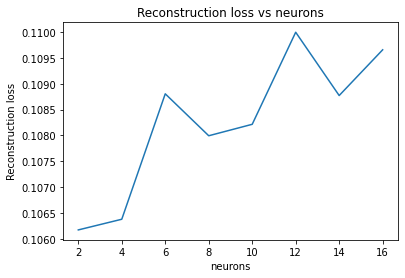

In [ ]:
# // Sgd with momentum optimizier
import matplotlib.pyplot as plt
import torch.optim.lr_scheduler as schedu
import torch.optim as optim
criterion = nn.MSELoss()
loss_range=[]
for bottleneck_neuron in range(2,17,2):
   ae= AE(bottleneck_neuron)
   ae.to(device)
   optimizer = optim.SGD(ae.parameters(), lr=0.001,momentum=0.9)
   scheduler = schedu.StepLR(optimizer, step_size=3, gamma=0.1)
   train(ae,10,optimizer,scheduler)
   test_loss=test(ae)
   print('test loss',test_loss)
   loss_range.append(test_loss)
no_of_neurons=[2,4,6,8,10,12,14,16]
plt.plot(no_of_neurons,loss_range)
plt.title('Reconstruction loss vs neurons')
plt.xlabel('neurons')
plt.ylabel('Reconstruction loss')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
test_set_array = mnist_testset.data.numpy()
test_set_array=test_set_array.reshape(len(test_set_array),-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_set_array=scaler.fit_transform(test_set_array)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
for i in range(10,780,20):
    pca = PCA(n_components=i)
    X_test_pca = pca.fit_transform(test_set_array)
    proj = pca.inverse_transform(X_test_pca)
    print('For i=',i ,'eigen vectors ',mean_squared_error(proj, test_set_array))
     

For i= 10 eigen vectors  0.03391267913403302
For i= 30 eigen vectors  0.017546188559824497
For i= 50 eigen vectors  0.011361943829087933
For i= 70 eigen vectors  0.008141354884508907
For i= 90 eigen vectors  0.006233361436659705
For i= 110 eigen vectors  0.004959097055928616
For i= 130 eigen vectors  0.004049976769412785
For i= 150 eigen vectors  0.0033482672135297965
For i= 170 eigen vectors  0.0028082673478062445
For i= 190 eigen vectors  0.002366969446317644
For i= 210 eigen vectors  0.001994493158584326
For i= 230 eigen vectors  0.0016780303366491472
For i= 250 eigen vectors  0.0014098683817009986
For i= 270 eigen vectors  0.0011740235083670587
For i= 290 eigen vectors  0.0009680461763420175
For i= 310 eigen vectors  0.0007905920986018032
For i= 330 eigen vectors  0.0006373504342651034
For i= 350 eigen vectors  0.0005044366894753079
For i= 370 eigen vectors  0.0003915470989488742
For i= 390 eigen vectors  0.0002980924419434772
For i= 410 eigen vectors  0.00022229293445162021
For i=

In [ ]:
' Accuracy of auto encoder for rms prop optimizatin is about 0.02 '
' Accuracy of pca for 10 eigen components  for rms prop optimizatin is about 0.03'